#### __Bài tập 2:__ Triển khai phương pháp khuếch tán lỗi sử dụng kỹ thuật phối màu Floyd – Steinberg và chuyển đổi một hình ảnh mức xám thành hình ảnh nhị phân.

#### __Giải thích code__

#### 1. Nhập các thư viện cần thiết

In [ ]:
# numpy để xử lý mảng
import numpy as np                          
# imread từ skimage.io để đọc ảnh
from skimage.io import imread               
# rgb2gray từ skimage.color để chuyển đổi ảnh sang grayscale
from skimage.color import rgb2gray          
# matplotlib.pyplot để vẽ đồ thị và hiển thị ảnh
import matplotlib.pyplot as plt             

#### 2. Định nghĩa hàm find_closest_palette_color để tìm màu gần nhất trong bảng màu

In [ ]:
# Hàm find_closest_palette_color nhận vào giá trị pixel oldpixel và trả về giá trị pixel gần nhất trong bảng màu nhị phân (0 hoặc 255)
def find_closest_palette_color(oldpixel):
    return int(round(oldpixel / 255)*255)

#### 3. Đọc ảnh và chuyển đổi sang grayscale

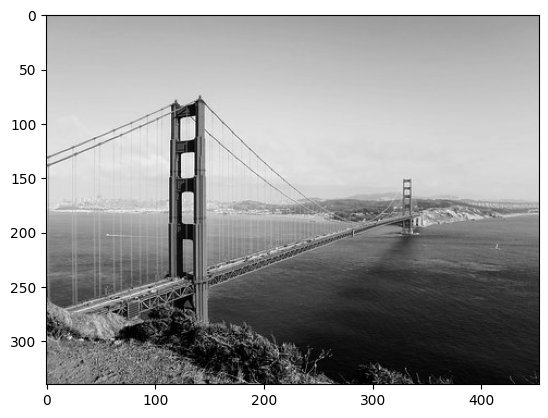

In [ ]:
# Đọc ảnh từ đường dẫn và chuyển đổi ảnh sang grayscale
# Nhân giá trị pixel với 255 để chuyển đổi từ khoảng [0, 1] sang [0, 255]
im = rgb2gray(imread('../images/goldengate.jpg'))*255       
# Tạo một bản sao của ảnh gốc im và lưu vào biến pixel
pixel = np.copy(im)                                         
# Lấy kích thước của ảnh (w là chiều rộng và h là chiều cao)
w, h = im.shape                                             
# Hiển thị ảnh gốc
plt.imshow(pixel, cmap='gray')                              

#### 4. Áp dụng thuật toán Floyd-Steinberg dithering

In [ ]:
# Lặp qua từng pixel của ảnh
for x in range(w):
    for y in range(h):
        oldpixel = pixel[x, y]
        # Tìm giá trị pixel mới newpixel gần nhất trong bảng màu nhị phân (0 hoặc 255)
        newpixel = find_closest_palette_color(oldpixel)             
        # Cập nhật giá trị pixel hiện tại với newpixel
        pixel[x, y] = newpixel                                      
        # Tính toán lỗi lượng tử hóa với quant_error giữa giá trị pixel cũ và giá trị pixel mới
        quant_error = oldpixel - newpixel                           
        # Phân phối lỗi lượng tử hóa cho các pixel lân cận theo thuật toán Floyd – Steinberg dithering
        # Pixel bên phải (x, y + 1) nhận quant_error * 7 / 16
        if y < h - 1:                                               
            pixel[x, y + 1] += quant_error * 7/16
        if x < w - 1:
            # Pixel phía dưới bên trái (x + 1, y – 1) nhận quant_error * 3 / 16
            if y > 0:                                               
                pixel[x + 1, y - 1] += quant_error * 3/16
            # Pixel phía dưới (x + 1, y) nhận quant_error * 5 / 16
            pixel[x + 1, y] += quant_error * 5/16                   
            # Pixel phía dưới bên phải (x + 1, y + 1) nhận quant_error * 1 / 16
            if y < h - 1:                                           
                pixel[x + 1, y + 1] += quant_error * 1/16

#### 5. Hiển thị ảnh đã được dithering

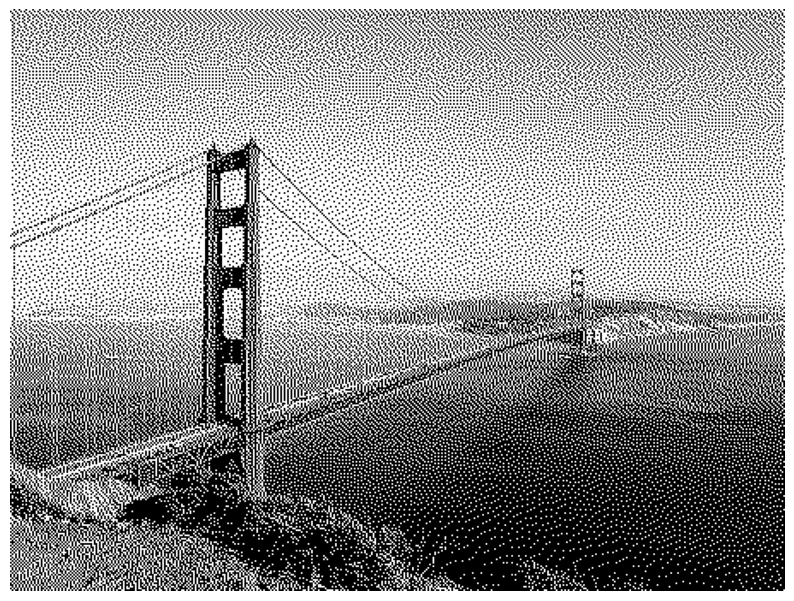

In [ ]:
# Tạo một hình ảnh với kích thước 10x20 inch
plt.figure(figsize=(10,20))         
# Hiển thị ảnh đã được phối màu
plt.imshow(pixel, cmap='gray')      
plt.axis('off')
# Hiển thị hình ảnh
plt.show()                          